# Supermarket Data Analysis

## Introduction of Problem Statement

AJ Ecom Pvt Ltd is one of the leading business who have supermarkets across different regions of India. They want to understand the performance of their supermarket in terms of customers, products and its sale.

### Reading the given dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
df_tran = pd.read_csv('Transactions.csv')

In [4]:
df_tran

,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type
0,80712190438,270351,28-02-2014,1,1,-5,-772,405.300,-4265.300,e-Shop
1,29258453508,270384,27-02-2014,5,3,-5,-1497,785.925,-8270.925,e-Shop
2,51750724947,273420,24-02-2014,6,5,-2,-791,166.110,-1748.110,TeleShop
3,93274880719,271509,24-02-2014,11,6,-3,-1363,429.345,-4518.345,e-Shop
4,51750724947,273420,23-02-2014,6,5,-2,-791,166.110,-1748.110,TeleShop
...,...,...,...,...,...,...,...,...,...,...
23048,94340757522,274550,25-01-2011,12,5,1,1264,132.720,1396.720,e-Shop
23049,89780862956,270022,25-01-2011,4,1,1,677,71.085,748.085,e-Shop
23050,85115299378,271020,25-01-2011,2,6,4,1052,441.840,4649.840,MBR
23051,72870271171,270911,25-01-2011,11,5,3,1142,359.730,3785.730,TeleShop


In [5]:
df_cust = pd.read_csv('Customer.csv')

In [6]:
df_cust

,customer_Id,DOB,Gender,city_code
0,268408,02-01-1970,M,4.0
1,269696,07-01-1970,F,8.0
2,268159,08-01-1970,F,8.0
3,270181,10-01-1970,F,2.0
4,268073,11-01-1970,M,1.0
...,...,...,...,...
5642,274474,19-12-1992,M,2.0
5643,267666,24-12-1992,M,6.0
5644,270476,25-12-1992,F,3.0
5645,269626,27-12-1992,F,5.0


In [7]:
df_prod_cat = pd.read_csv('prod_cat_info.csv')

In [8]:
df_prod_cat

,prod_cat_code,prod_cat,prod_sub_cat_code,prod_subcat
0,1,Clothing,4,Mens
1,1,Clothing,1,Women
2,1,Clothing,3,Kids
3,2,Footwear,1,Mens
4,2,Footwear,3,Women
5,2,Footwear,4,Kids
6,3,Electronics,4,Mobiles
7,3,Electronics,5,Computers
8,3,Electronics,8,Personal Appliances
9,3,Electronics,9,Cameras


## Data Cleaning

Dropping unnecessary columns

In [9]:
df_cust = df_cust.drop('city_code',axis=1)

Renaming the columns

In [10]:
df_tran = df_tran.rename(columns = {'Qty':'qty','Rate':'rate','Tax':'tax','Store_type':'store_type'})

In [11]:
df_cust = df_cust.rename(columns = {'customer_Id':'cust_id','DOB':'cust_dob','Gender':'cust_gender'})

In [12]:
df_cust

,cust_id,cust_dob,cust_gender
0,268408,02-01-1970,M
1,269696,07-01-1970,F
2,268159,08-01-1970,F
3,270181,10-01-1970,F
4,268073,11-01-1970,M
...,...,...,...
5642,274474,19-12-1992,M
5643,267666,24-12-1992,M
5644,270476,25-12-1992,F
5645,269626,27-12-1992,F


In [13]:
df_prod_cat = df_prod_cat.rename(columns = {'prod_sub_cat_code':'prod_subcat_code'})

In transaction dataset, quantity, rate, total amount contain negative values. As we know it can't be negative. So we have to convert negative values in quantity, rate and total amount column into positive values.

In [14]:
x = []
for value in df_tran['qty']:
    if value<0:
        x.append(-(value))
    else:
        x.append(value)
df_tran['qty'] = pd.DataFrame(x)

In [15]:
y = []
for value in df_tran['rate']:
    if value<0:
        y.append(-(value))
    else:
        y.append(value)
df_tran['rate'] = pd.DataFrame(y)

In [16]:
z = []
for value in df_tran['total_amt']:
    if value<0:
        z.append(-(value))
    else:
        z.append(value)
df_tran['total_amt'] = pd.DataFrame(z)

In [17]:
df_tran

,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,qty,rate,tax,total_amt,store_type
0,80712190438,270351,28-02-2014,1,1,5,772,405.300,4265.300,e-Shop
1,29258453508,270384,27-02-2014,5,3,5,1497,785.925,8270.925,e-Shop
2,51750724947,273420,24-02-2014,6,5,2,791,166.110,1748.110,TeleShop
3,93274880719,271509,24-02-2014,11,6,3,1363,429.345,4518.345,e-Shop
4,51750724947,273420,23-02-2014,6,5,2,791,166.110,1748.110,TeleShop
...,...,...,...,...,...,...,...,...,...,...
23048,94340757522,274550,25-01-2011,12,5,1,1264,132.720,1396.720,e-Shop
23049,89780862956,270022,25-01-2011,4,1,1,677,71.085,748.085,e-Shop
23050,85115299378,271020,25-01-2011,2,6,4,1052,441.840,4649.840,MBR
23051,72870271171,270911,25-01-2011,11,5,3,1142,359.730,3785.730,TeleShop


In customer table, DOB of customer is given. Using this field we can calculate age of customer.

In [18]:
df_cust['cust_dob'] = pd.to_datetime(df_cust['cust_dob'])

df_cust['cust_age'] = df_cust['cust_dob'].apply(lambda x : (pd.datetime.now().year - x.year))

Dropping customers dob column.

In [19]:
df_cust = df_cust.drop('cust_dob',axis=1)

In [20]:
df_cust

,cust_id,cust_gender,cust_age
0,268408,M,50
1,269696,F,50
2,268159,F,50
3,270181,F,50
4,268073,M,50
...,...,...,...
5642,274474,M,28
5643,267666,M,28
5644,270476,F,28
5645,269626,F,28


Now joining transactions table with customers table.

In [21]:
result = pd.merge(df_tran, df_cust, on=['cust_id'])

In [22]:
result

,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,qty,rate,tax,total_amt,store_type,cust_gender,cust_age
0,80712190438,270351,28-02-2014,1,1,5,772,405.300,4265.300,e-Shop,M,39
1,80712190438,270351,20-02-2014,1,1,5,772,405.300,4265.300,e-Shop,M,39
2,36957441426,270351,16-09-2013,3,2,3,361,113.715,1196.715,Flagship store,M,39
3,12236277258,270351,18-03-2013,8,3,3,1030,324.450,3414.450,e-Shop,M,39
4,13181563739,270351,13-12-2011,6,5,1,1048,110.040,1158.040,e-Shop,M,39
...,...,...,...,...,...,...,...,...,...,...,...,...
23048,16293185603,274931,31-01-2011,8,3,3,137,43.155,454.155,Flagship store,M,48
23049,70163958026,267902,30-01-2011,10,5,4,404,169.680,1785.680,e-Shop,M,45
23050,20417144530,269556,29-01-2011,10,6,3,654,206.010,2168.010,Flagship store,M,48
23051,58531412371,274935,29-01-2011,10,5,4,104,43.680,459.680,Flagship store,F,43


Converting datatype of necessary columns

In [23]:
result['prod_subcat_code'] = result['prod_subcat_code'].astype(int)

In [24]:
result['prod_cat_code'] = result['prod_cat_code'].astype(int)

In [25]:
df_prod_cat['prod_subcat_code'] = df_prod_cat['prod_subcat_code'].astype(int)

In [26]:
df_prod_cat['prod_cat_code'] = df_prod_cat['prod_cat_code'].astype(int)

Now merging product category table with resultant above table.

In [27]:
new_df = pd.merge(result, df_prod_cat, on=['prod_cat_code','prod_subcat_code'])

Dropping unnecessary columns and records.

In [28]:
new_df = new_df.drop(['prod_cat_code','prod_subcat_code'],axis=1)

In [29]:
new_df = new_df.drop_duplicates()

In [30]:
new_df

,transaction_id,cust_id,tran_date,qty,rate,tax,total_amt,store_type,cust_gender,cust_age,prod_cat,prod_subcat
0,80712190438,270351,28-02-2014,5,772,405.300,4265.300,e-Shop,M,39,Clothing,Women
1,80712190438,270351,20-02-2014,5,772,405.300,4265.300,e-Shop,M,39,Clothing,Women
2,18505840838,271509,16-12-2013,3,1229,387.135,4074.135,Flagship store,M,39,Clothing,Women
3,92814475704,267750,16-08-2013,4,284,119.280,1255.280,Flagship store,M,34,Clothing,Women
4,92814475704,267750,7/8/2013,4,284,119.280,1255.280,Flagship store,M,34,Clothing,Women
...,...,...,...,...,...,...,...,...,...,...,...,...
23048,7173864364,271157,9/4/2011,5,788,413.700,4353.700,Flagship store,F,47,Bags,Women
23049,5618131425,272010,3/3/2011,2,1150,241.500,2541.500,MBR,F,48,Bags,Women
23050,18727956164,267161,23-02-2011,5,668,350.700,3690.700,e-Shop,M,39,Bags,Women
23051,60416814232,273281,18-02-2011,4,202,84.840,892.840,Flagship store,F,32,Bags,Women


Now this is cleaned dataset.

## Data Analysis & Visualization

In [31]:
plt.style.use('classic')

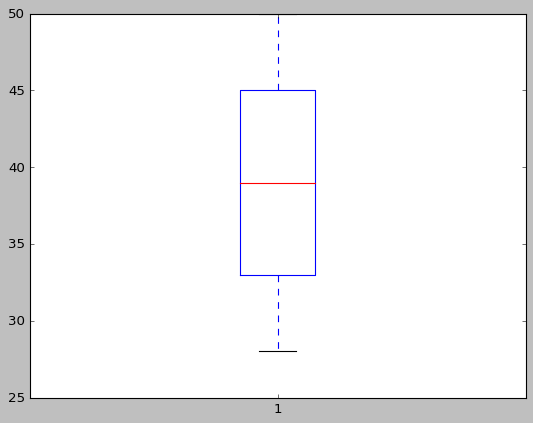

In [32]:
plt.boxplot(new_df['cust_age'])
plt.show()

As we can see, there are no outliers in age column and average of customer is around 39 year.

In [33]:
new_df.describe()

,transaction_id,cust_id,qty,rate,tax,total_amt,cust_age
count,2.304000e+04,23040.000000,23040.000000,23040.000000,23040.000000,23040.000000,23040.000000
mean,5.006955e+10,271021.880252,3.007031,787.126215,248.677488,2617.034520,38.966493
std,2.898062e+10,2431.573668,1.420474,415.761913,187.188311,1969.934133,6.628458
min,3.268991e+06,266783.000000,1.000000,70.000000,7.350000,77.350000,28.000000
25%,2.493315e+10,268935.000000,2.000000,426.000000,98.280000,1034.280000,33.000000
50%,5.009188e+10,270980.500000,3.000000,791.000000,199.080000,2095.080000,39.000000
75%,7.532632e+10,273114.250000,4.000000,1150.000000,365.767500,3849.267500,45.000000
max,9.998755e+10,275265.000000,5.000000,1500.000000,787.500000,8287.500000,50.000000


This shows average shopping amount is 2617.

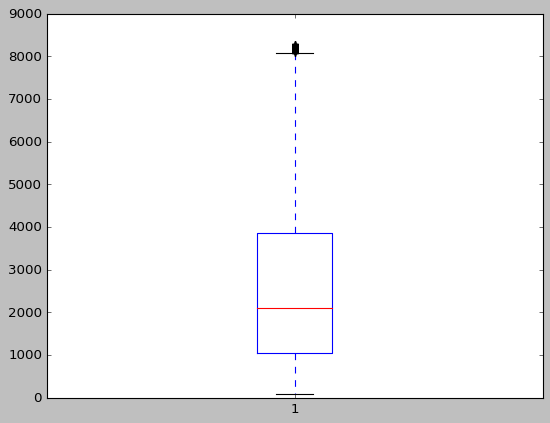

In [34]:
plt.boxplot(new_df['total_amt'])
plt.show()

In total amount column also, only few outliers are there. So we ignore them.

In [35]:
gender=new_df.cust_gender.value_counts(normalize=True)

In [36]:
gender

M    0.512543
F    0.487457
Name: cust_gender, dtype: float64

Text(0, 0.5, 'Percentage')

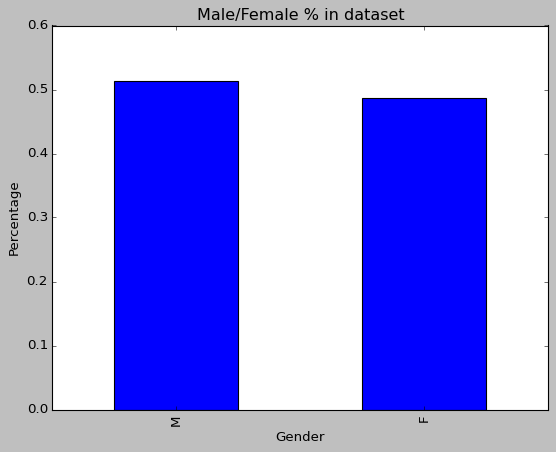

In [37]:
gender.plot.bar()
plt.title("Male/Female % in dataset")
plt.xlabel("Gender")
plt.ylabel("Percentage")

In the given dataset, males are slightly more than females.

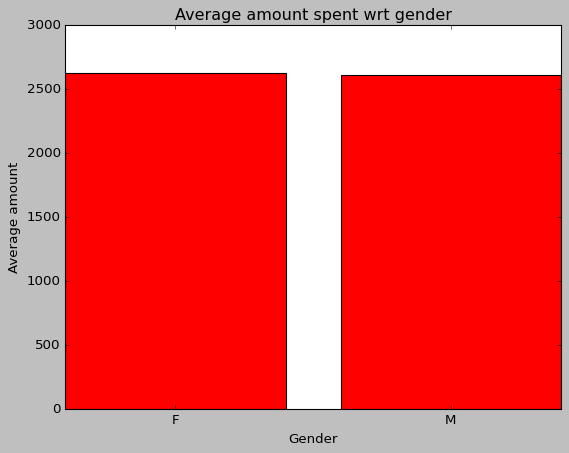

In [38]:
amt_differ=new_df.groupby(["cust_gender"])['total_amt'].mean()
plt.bar(amt_differ.index, amt_differ.values, color="red")
plt.title("Average amount spent wrt gender")
plt.xlabel("Gender")
plt.ylabel("Average amount")
plt.show()

This shows average amount does not vary based on gender.

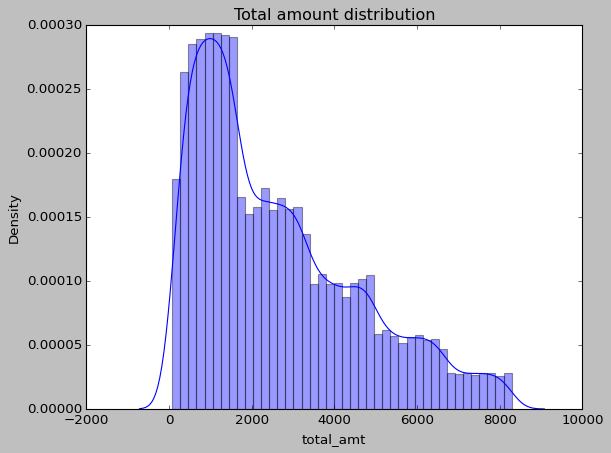

In [39]:
sns.distplot(new_df['total_amt'])
plt.title("Total amount distribution")
plt.show()

This shows, more products got sold which have total amount within 100-2000.

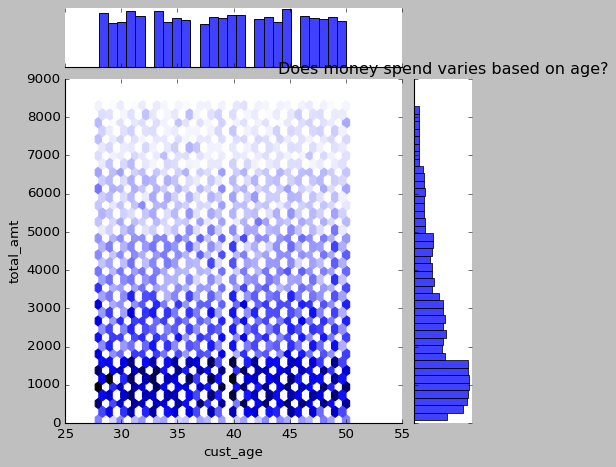

In [40]:
sns.jointplot(x ='cust_age', y ='total_amt', data = new_df, kind ='hex')
plt.title("Does money spend varies based on age?")
plt.show()

There is no significant relationship between age and total amount field which means all the age group people spend equally.

In [41]:
top10 = new_df[['cust_id','total_amt']]

In [42]:
top10

,cust_id,total_amt
0,270351,4265.300
1,270351,4265.300
2,271509,4074.135
3,267750,1255.280
4,267750,1255.280
...,...,...
23048,271157,4353.700
23049,272010,2541.500
23050,267161,3690.700
23051,273281,892.840


In [43]:
top10 = top10.groupby('cust_id').sum().nlargest(10,['total_amt'])
top10

,total_amt
cust_id,
270831,53772.615
271834,48425.520
271862,44266.300
267419,42951.350
275252,42114.865
269539,41596.620
273481,41389.985
269233,40762.345
274035,40355.705


Text(0, 0.5, 'Total amount')

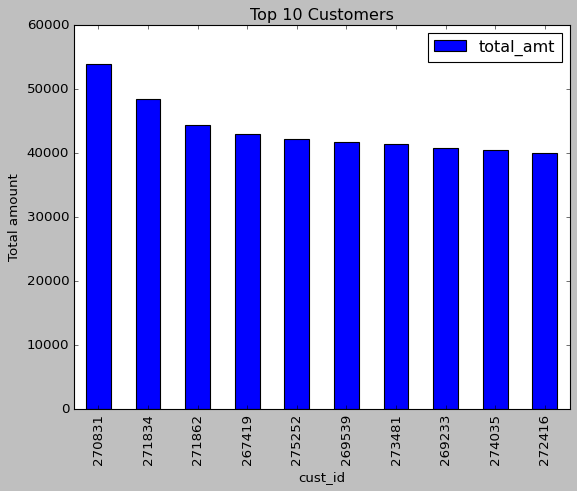

In [44]:
top10.plot.bar()
plt.title("Top 10 Customers")
plt.ylabel("Total amount")

These are top 10 customer id.

In [45]:
y = new_df[['prod_cat']].value_counts()

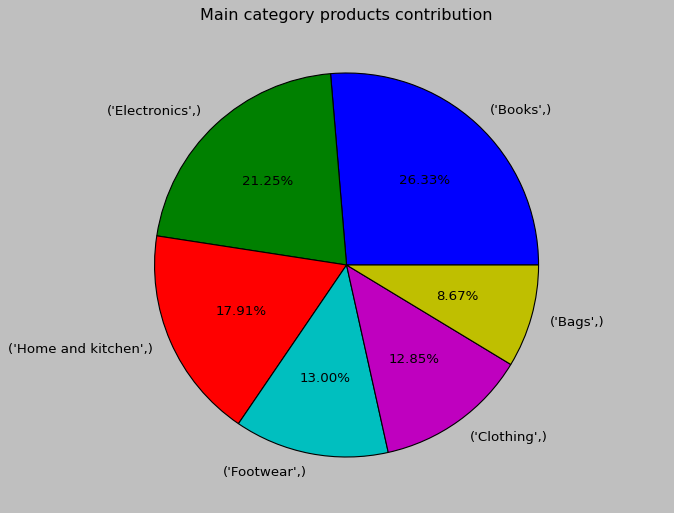

In [46]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.axis('equal')
ax.pie(y.values, labels = y.index, autopct='%1.2f%%')
plt.title('Main category products contribution')
plt.show()

'Books' category is preferred by the customers.

In [47]:
z = new_df[['prod_subcat']].value_counts()

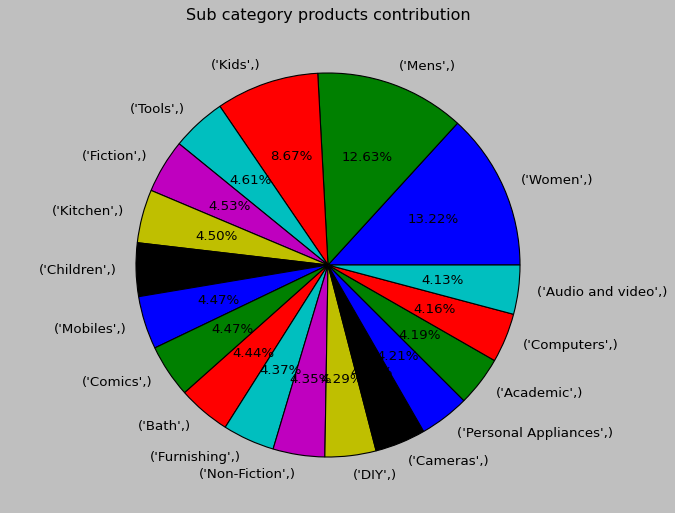

In [48]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.axis('equal')
ax.pie(z.values, labels = z.index, autopct='%1.2f%%')
plt.title('Sub category products contribution')
plt.show()

'Mens','Women' and 'Kids'. These subcategory products got most sold.

In [49]:
new_df['months'] = pd.DatetimeIndex(new_df['tran_date']).month

In [50]:
new_df['quarter'] = pd.DatetimeIndex(new_df['tran_date']).quarter

In [51]:
a = new_df[['months','quarter','total_amt']]

In [52]:
a = a.groupby('months')['total_amt'].sum()

Text(0, 0.5, 'Amount')

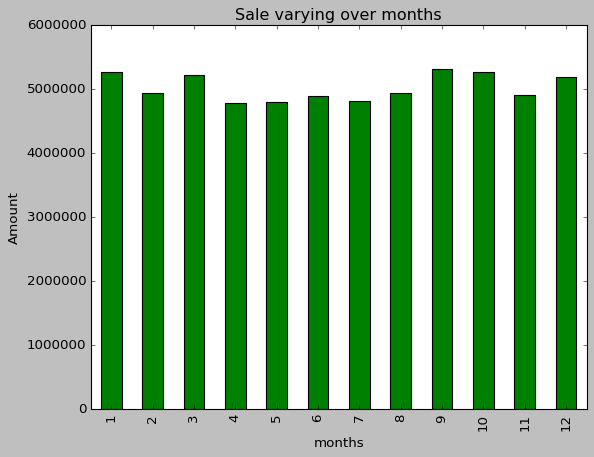

In [53]:
a.plot.bar(color='green')
plt.title('Sale varying over months')
plt.ylabel('Amount')

This shows in last quarter on year more sale occurs.

Text(0.5, 1.0, 'Storetype preferred for shopping')

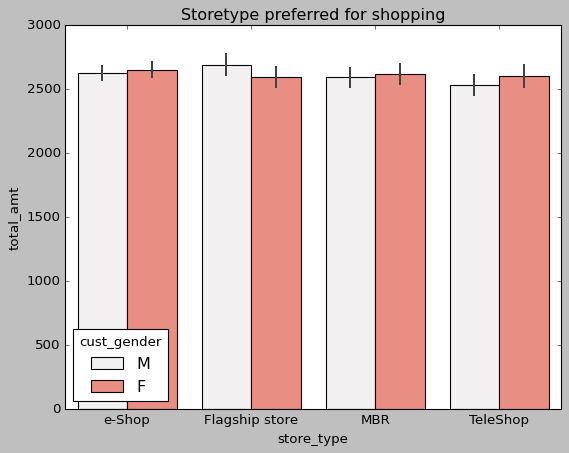

In [54]:
sns.barplot(x='store_type',y='total_amt',hue='cust_gender',data=new_df,color="salmon")
plt.title('Storetype preferred for shopping')

This shows on an average, flagship type store is preferred by customer.

Text(0.5, 1.0, 'Customer age distribution')

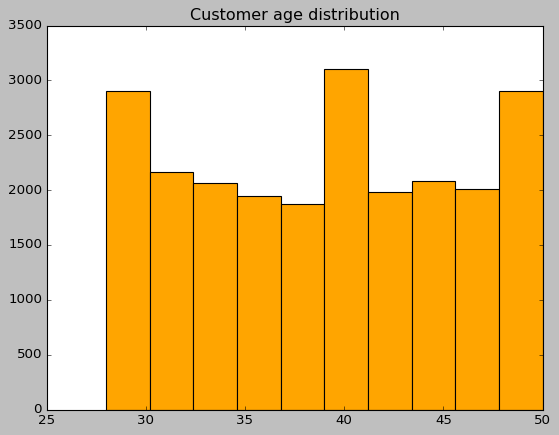

In [55]:
plt.hist(new_df['cust_age'],stacked=True, color='orange')
plt.title('Customer age distribution')

In given dataset, more number of customers have age around 28-30 years, 40 years, 50 years etc.

In [56]:
new_df['weekday'] = pd.DatetimeIndex(new_df['tran_date']).weekday

Text(0, 0.5, 'Amount')

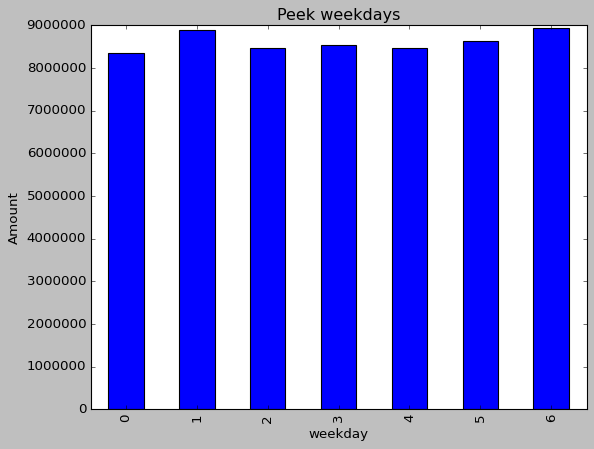

In [57]:
a = new_df[['weekday','total_amt']]
a = a.groupby('weekday')['total_amt'].sum()
a.plot.bar(color='blue')
plt.title('Peek weekdays')
plt.ylabel('Amount')

This shows Monday and Saturday are the peek days.

## Conclusion

1. In the given dataset there is no gender bias which means shopping of both the gender is nearly equal

2. Products which are having price in range of 100-2000 is sold in more quantity

3. No significant impact of customer age on purchase of the product, means amount spent by group of all ages category is nearly equal

4. Company should focus on top10 customer(Prime member)

5. ‘Books’ and ‘Electronics’ category product sold in more quantity

6. ‘Men’, ‘Women’ and ‘Kids’ subcategory products sold in more quantity

7. Last quarter of the year is more profitable duration for the company

8. Monday and Saturday are peak weekdays for the company

9. Men prefers shopping at flagship store and women prefers e-shopping

10. Customers having age around 29, 40 and 50 year do shop in more quantity
